In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/HDFC.csv')

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12


In [ ]:
df['Date'].unique()

array(['2000-01-03', '2000-01-04', '2000-01-05', ..., '2021-04-28',
       '2021-04-29', '2021-04-30'], dtype=object)

In [ ]:
df.shape

(5306, 12)

In [ ]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5306 non-null   object 
 1   Symbol      5306 non-null   object 
 2   Series      5306 non-null   object 
 3   Prev Close  5306 non-null   float64
 4   Open        5306 non-null   float64
 5   High        5306 non-null   float64
 6   Low         5306 non-null   float64
 7   Last        5306 non-null   float64
 8   Close       5306 non-null   float64
 9   VWAP        5306 non-null   float64
 10  Volume      5306 non-null   int64  
 11  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 497.6+ KB


In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06,2.620759e+14
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06,3.607844e+14
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05,2.461178e+13
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06,1.684207e+14
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06,3.419282e+14
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16


In [ ]:
df.duplicated().sum()

0

In [ ]:
(df.isnull().sum()/len(df))*100

Date          0.0
Symbol        0.0
Series        0.0
Prev Close    0.0
Open          0.0
High          0.0
Low           0.0
Last          0.0
Close         0.0
VWAP          0.0
Volume        0.0
Turnover      0.0
dtype: float64

In [ ]:
# We will drop the Markdown columns as they have null values over 5%:
# using inplace=True modifies the original DataFrame
threshold = 0.05  # 5%
null_counts = df.isnull().sum() / len(df)
columns_to_drop = null_counts[null_counts > threshold].index
df.drop(columns_to_drop, axis=1, inplace=True)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14


In [ ]:
import pandas as pd

# Assuming you have a preprocessed dataframe named 'processed_df'

# Save the dataframe to a file
df.to_csv('HDFC.csv', index=False)

In [ ]:
from google.colab import files
import pandas as pd

# Assuming you have a preprocessed dataframe named 'processed_df'

# Save the dataframe to a CSV file
df.to_csv('HDFC.csv', index=False)

# Download the CSV file to your local system
files.download('HDFC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

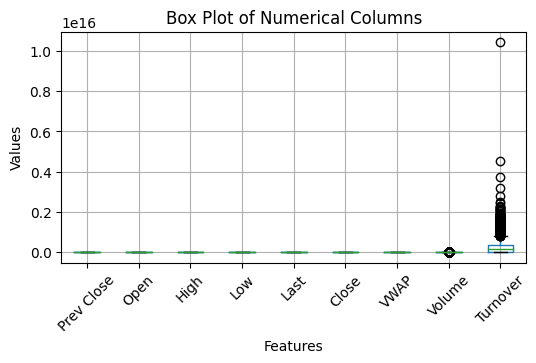

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing numerical columns for which you want to create box plots

# Create a box plot for each numerical column
plt.figure(figsize=(6, 3))  # Optional: adjust figure size
df.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.show()

In [ ]:
# Calculate the first quartile (Q1)
Q1 = df.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Filter out rows with outliers in any numerical column
outlier_mask = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)
df_cleaned = df[~outlier_mask]

# Print the cleaned DataFrame without outliers
print(df_cleaned)

            Date Symbol Series  Prev Close     Open     High      Low    Last  \
0     2000-01-03   HDFC     EQ      271.75   293.50   293.50   293.50   293.5   
1     2000-01-04   HDFC     EQ      293.50   317.00   317.00   297.00   304.0   
2     2000-01-05   HDFC     EQ      304.05   290.00   303.90   285.00   295.0   
3     2000-01-06   HDFC     EQ      292.80   301.00   314.00   295.00   296.0   
4     2000-01-07   HDFC     EQ      296.45   290.00   296.35   281.00   287.1   
...          ...    ...    ...         ...      ...      ...      ...     ...   
5292  2021-04-09   HDFC     EQ     2502.55  2522.00  2556.00  2492.30  2515.7   
5296  2021-04-16   HDFC     EQ     2547.15  2550.00  2589.80  2546.85  2569.0   
5300  2021-04-23   HDFC     EQ     2479.70  2455.05  2504.15  2437.50  2491.0   
5302  2021-04-27   HDFC     EQ     2509.80  2494.15  2526.80  2486.25  2514.0   
5304  2021-04-29   HDFC     EQ     2577.00  2590.90  2628.00  2533.00  2539.7   

        Close     VWAP   Vo

<ipython-input-15-729939885129>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-15-729939885129>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-15-729939885129>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_mask = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)


In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06,2.620759e+14
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06,3.607844e+14
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05,2.461178e+13
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06,1.684207e+14
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06,3.419282e+14
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing historical stock data

# Feature Engineering
df['Prev_Close'] = df['Close'].shift(1)  # Previous day's closing price
df['Prev_Open'] = df['Open'].shift(1)  # Previous day's opening price
df['Daily_Price_Variation'] = df['High'] - df['Low']  # Daily price variation
df['Price_Change'] = df['Close'] - df['Open']  # Price change within a day
df['Volume_Change'] = df['Volume'].diff()  # Change in volume from previous day

# Moving Averages
df['MA5'] = df['Close'].rolling(window=5).mean()  # 5-day moving average
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df['RSI'] = calculate_rsi(df)

# Drop NaN values resulting from feature engineering
df.dropna(inplace=True)

# Select relevant features
selected_features = ['Prev_Close', 'Prev_Open', 'Daily_Price_Variation', 'Price_Change',
                     'Volume_Change', 'MA5', 'MA20', 'RSI']

# Extract features and target variable
X = df[selected_features]
y = df['Close']  # Target variable (next day's closing price)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df[selected_features]
y = df['Close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (4229, 8) Target: (4229,)
Testing set - Features: (1058, 8) Target: (1058,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr.score(X_test, y_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)
print('RMSE of LR = ', mse)
print('R2 Score of LR = ', r2)


RMSE of LR =  305.74311374426975
R2 Score of LR =  0.999341732410686


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rms_rf = np.sqrt(mean_squared_error(y_pred_rf, y_test))
r2_rf = r2_score(y_pred_rf, y_test)
print('RMSE of RF = ', rms_rf)
print('R2 Score of RF = ', r2_rf)

RMSE of RF =  19.022873910467982
R2 Score of RF =  0.9992211682917159


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rms_dt = np.sqrt(mean_squared_error(y_pred_dt, y_test))
r2_dt = r2_score(y_pred_dt, y_test)
print('RMSE of DT = ', rms_dt)
print('R2 Score of DT = ', r2_dt)

RMSE of DT =  26.823107393899214
R2 Score of DT =  0.9984470011613209


In [ ]:
# RF achieves a good balance between predictive performance (RMSE) and model fit (R² score),
#  making it a robust choice for predicting stock prices

In [ ]:
last_date = df['Date'].max()
last_date

'2021-04-30'

In [ ]:
#Prediction
rf_model.predict(X_test)

array([1378.7735,  640.783 ,  514.4135, ..., 2082.9205, 1132.007 ,
       1055.9   ])